# Audio Signal Processing Project: Exploring Fourier Transforms

**Objective**: This project explores how Fourier Transforms can be used to analyze and modify audio signals by adjusting bass, midrange, and treble frequencies. Through this, I aim to understand how frequency filtering impacts sound.

**Goals**:
- Use `numpy`'s FFT tools (`rfft`, `irfft`, and `rfftfreq`) to transform and manipulate audio signals.
- Apply custom filters to control bass, midrange, and treble ranges, creating a tone control effect.

**Author**: Keshav Jaitly


________________________________________________________________________________
## Exploring Fast Fourier Transform (FFT) in NumPy

In this project, I’m working with Fourier Transforms using NumPy’s Fast Fourier Transform (FFT) functions. The focus is on understanding how to transform real-valued signal waveforms, \( S(t) \), into their frequency components, \( G(f) \), and then back into the time domain. This process allows for analysis, filtering, and modification of audio signals at the frequency level.

Since the waveforms \( S(t) \) are real, the frequency coefficients \( G(f) \) generated will generally be complex. Here’s how the FFT process is broken down with NumPy:

1. **Transforming to the Frequency Domain**:
   - ```g_f = np.fft.rfft(s_t)```: This function performs an FFT on a real waveform \( S(t) \equiv s\_t \) and returns the frequency components \( G(f) \equiv g\_f \).
   
2. **Retrieving Frequency Values**:
   - ```freq = np.fft.rfftfreq(s_t.size, sampling_time)```: This function provides the corresponding frequencies in Hz for each frequency component in \( G(f) \equiv g\_f \), helping to understand the spectrum of the signal.

3. **Inverse Transforming to the Time Domain**:
   - ```s_t = np.fft.irfft(g_f, len(s_t))```: This function performs the inverse transform, converting \( G(f) \equiv g\_f \) back to the time domain as \( S(t) \equiv s\_t \), which is useful after filtering or modifying \( g\_f \).

### Sampling Time and Rate
The `sampling_time` variable represents the interval between samples of the signal waveform. For example, with a `sampling_rate` of 1000 Hz (1000 samples/second), `sampling_time` would be calculated as \( 1/\text{sampling\_rate} = 0.001 \) seconds.

This project provides a hands-on approach to understanding FFTs and inverse FFTs, enabling me to explore the frequency characteristics of signals and make targeted modifications.


_________________________________________________________________________________
## Project Background

In this project, I’m investigating the sound produced by a guitar string, specifically analyzing the high-E string’s waveform \( S(t) \), its frequency content \( G(f) \), and the resulting audio playback. The high-E string typically resonates at a fundamental frequency of around 330 Hz, but its complete sound profile is more complex due to a range of factors.

### Key Exploration Areas

1. **Analyzing the Guitar Signal**:
   - I’m examining the waveform \( S(t) \) of the high-E string, which is shaped by various conditions, such as where the string is plucked, the pickup position, and the initial displacement of the string.
   - This signal is not a simple sine wave at the fundamental frequency; rather, it’s a complex Fourier series that includes both the fundamental and harmonic frequencies. Each component’s amplitude is influenced by the physical and initial conditions of the string and how the pickup captures the waveform.

2. **Applying Frequency-Based Filters**:
   - I’m applying filters directly in the frequency domain and observing how these adjustments affect the signal when transformed back to the time domain. This allows for the isolation and amplification or attenuation of specific frequency ranges, providing insight into how different frequency components contribute to the overall sound.

### Understanding the High-E String Signal

The high-E string’s sound is a rich combination of its fundamental frequency and several harmonics, determined by a Fourier series sum of frequency components. The amplitude \( S(t) \) captured by the pickup reflects this complex combination, where each harmonic’s presence and strength depend on physical factors like plucking position, string tension, and the exact point where the pickup samples the signal. This project uses Fourier analysis to break down and manipulate these components, allowing for a deeper exploration of how sound profiles are constructed and modified.



___________________________________________________________________________
## Part 1: Generating and Analyzing a Sinusoidal Signal

In this section, I’m creating a sinusoidal waveform, \( S(t) \), representing the fundamental frequency of the high-E string on a guitar, which is approximately 330 Hz. This signal will help me understand the basic structure of the sound and examine both its time-domain and frequency-domain representations.

### Steps and Specifications

1. **Generating the Signal**:
   - Fundamental frequency: \( f_{\text{fund}} = 330 \, \text{Hz} \)
   - Sampling rate: \( \text{rate} = 44100 \) samples/sec, sufficient for capturing audio frequencies with high resolution.
   - Duration: \( S(t) \) will span from \( 0 \leq t \leq 3 \) seconds.

2. **Visualizing the Signal**:
   - Plot the time-domain waveform \( S(t) \) over different intervals to observe its structure:
     - From \( 0 \leq t \leq 0.7 \) seconds.
     - From \( 0 \leq t \leq 0.1 \) seconds for a more detailed view.
   - Calculate and plot the magnitude of the frequency spectrum \( |G(f)| \) for frequencies \( 0 \leq f \leq 500 \, \text{Hz} \), revealing the primary frequency components.

3. **Playing the Signal**:
   - Using the IPython `Audio` function, I’ll play the generated \( S(t) \) to hear the pure sinusoidal sound at the fundamental frequency:
     ```python
     from IPython.display import Audio
     Audio(s_t, rate=rate)
     ```

4. **Simulating a Damped String**:
   - To simulate a more realistic sound, I’ll apply an exponential decay to \( S(t) \) with a characteristic decay time of 0.7 seconds. This damping effect models how a real guitar string’s amplitude decreases over time, reflecting the natural decay of a plucked string.
   - I’ll then repeat the visualizations and playback, examining the differences introduced by the decay.

___________________________________________________________________________

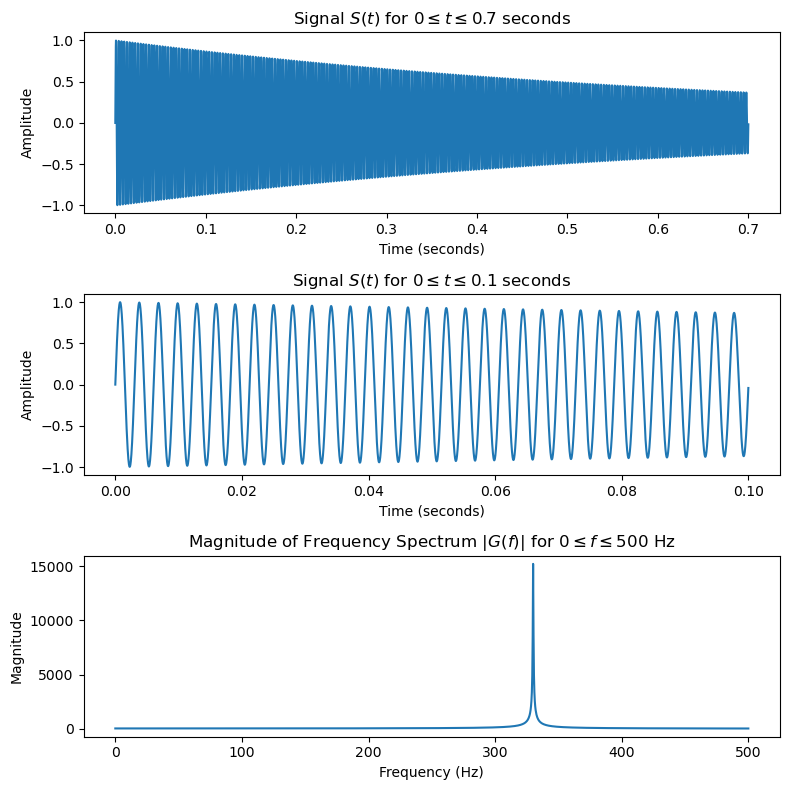

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Set parameters for the audio signal
fundamental_frequency = 330  # Fundamental frequency of the signal in Hz
sampling_rate = 44100        # Sampling rate in Hz (common audio rate)
duration = 3                 # Duration of the signal in seconds
time_step = 1 / sampling_rate # Time interval between samples

# Create a time array from 0 to the specified duration with the given time step
time = np.arange(0, duration + time_step, time_step)

# Generate the signal S(t) as a sine wave with an exponential decay
# The sine wave is modulated by an exponential decay function exp(-time / 0.7)
signal = np.sin(2 * np.pi * fundamental_frequency * time) * np.exp(-time / 0.7)

# Perform a Fourier Transform on the signal to analyze its frequency components
frequency_spectrum = np.fft.rfft(signal)
frequencies = np.fft.rfftfreq(signal.size, time_step)

# Plotting the time-domain and frequency-domain representations
fig, axs = plt.subplots(3, 1, figsize=(8, 8))  # Create a 3-row plot layout

# Plot 1: Signal in the time domain for the first 0.7 seconds
axs[0].plot(time[time < 0.7], signal[time < 0.7])
axs[0].set_title("Signal $S(t)$ for $0 \\leq t \\leq 0.7$ seconds")
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Amplitude")

# Plot 2: Zoomed-in view of the signal for the first 0.1 seconds
axs[1].plot(time[time < 0.1], signal[time < 0.1])
axs[1].set_title("Signal $S(t)$ for $0 \\leq t \\leq 0.1$ seconds")
axs[1].set_xlabel("Time (seconds)")
axs[1].set_ylabel("Amplitude")

# Plot 3: Frequency spectrum showing the magnitude of the Fourier Transform for frequencies < 500 Hz
axs[2].plot(frequencies[frequencies < 500], np.abs(frequency_spectrum[frequencies < 500]))
axs[2].set_title("Magnitude of Frequency Spectrum $|G(f)|$ for $0 \\leq f \\leq 500$ Hz")
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("Magnitude")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Play the generated audio signal using IPython's Audio function
Audio(signal, rate=sampling_rate)




## Part 2: Synthesizing a Realistic Guitar String Waveform

In this section, I’m synthesizing a more realistic waveform \( S(t) \) to model the sound of a guitar string by incorporating harmonics alongside the fundamental frequency. This approach mimics the actual sound produced by a vibrating guitar string, which contains not just the fundamental frequency but also additional harmonic frequencies, each with its own amplitude.

### Steps and Specifications

1. **Building the Synthesized Signal**:
   - **Fundamental Frequency**: Start with the fundamental frequency of the high-E string, \( f_{\text{fund}} = 330 \, \text{Hz} \).
   - **Harmonics**: Add six harmonics to the fundamental. The \( n \)-th harmonic frequency is represented by \( \sin(2\pi \, n \, f_{\text{fund}} \, t) \), where \( n = 2, 3, \dots, 7 \).
   - **Amplitudes**: Assign each harmonic a unique amplitude, for example by generating random values divided by \( n \) (e.g., `random() / n`), to simulate the natural diminishing effect of higher harmonics.

2. **Applying an Exponential Decay**:
   - To add realism, apply an exponential decay with a time constant of 0.7 seconds to \( S(t) \). This models the natural damping effect, where a plucked string’s amplitude gradually decreases over time.

3. **Visualizing the Synthesized Signal**:
   - Plot the time-domain waveform \( S(t) \) as in Part 1, but now synthesized with harmonics.
   - Calculate and plot the magnitude of the frequency spectrum \( |G(f)| \) for \( f \leq 3000 \, \text{Hz} \), showcasing the fundamental frequency and its harmonics.

4. **Playing the Synthesized Signal**:
   - Use the IPython `Audio` function to listen to the synthesized waveform:
     ```python
     from IPython.display import Audio
     Audio(s_t, rate=rate)
     ```

5. **Experimenting with Harmonic Amplitudes**:
   - Try different amplitude settings for the harmonics, adjust their values, and re-plot the waveform and frequency spectrum. Listening to each version reveals how varying harmonic amplitudes shape the overall sound, giving insight into how subtle changes in frequency content contribute to timbre.


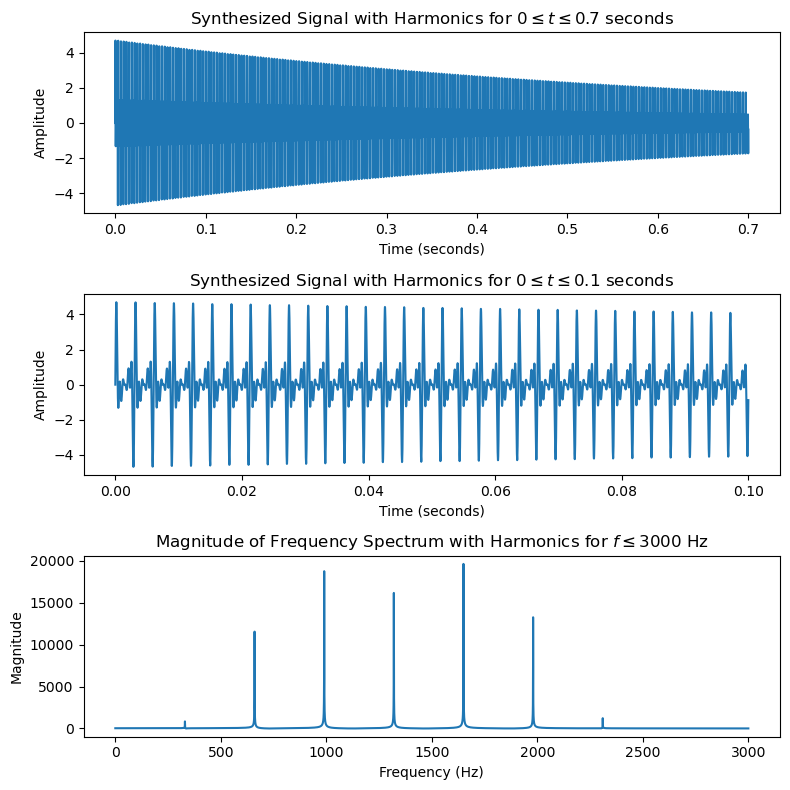

In [4]:
# Import required libraries (already assumed imported in the same session)
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Parameters for the signal
num_harmonics = 7           # Number of harmonics to include in the synthesized signal
fundamental_frequency = 330  # Fundamental frequency of the signal in Hz
decay_constant = 0.7         # Decay rate for exponential damping

# Initialize the synthesized signal array with zeros, matching the size of the time array
synthesized_signal = np.zeros(time.size)

# Generate the signal by summing up harmonics
# Each harmonic frequency is a multiple of the fundamental frequency
# A random amplitude factor is added to each harmonic to create a more natural sound
for harmonic in range(1, num_harmonics + 1):
    amplitude = 2 * np.random.random()  # Random amplitude factor between 0 and 2
    synthesized_signal += amplitude * np.sin(2 * np.pi * harmonic * fundamental_frequency * time)

# Apply exponential decay to the synthesized signal to simulate damping
synthesized_signal *= np.exp(-time / decay_constant)

# Plotting the time-domain and frequency-domain representations of the synthesized signal
fig, axs = plt.subplots(3, 1, figsize=(8, 8))  # Create a 3-row subplot layout

# Plot 1: Synthesized signal for the first 0.7 seconds
axs[0].plot(time[time < 0.7], synthesized_signal[time < 0.7])
axs[0].set_title("Synthesized Signal with Harmonics for $0 \\leq t \\leq 0.7$ seconds")
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Amplitude")

# Plot 2: Zoomed-in view of the synthesized signal for the first 0.1 seconds
axs[1].plot(time[time < 0.1], synthesized_signal[time < 0.1])
axs[1].set_title("Synthesized Signal with Harmonics for $0 \\leq t \\leq 0.1$ seconds")
axs[1].set_xlabel("Time (seconds)")
axs[1].set_ylabel("Amplitude")

# Compute the Fourier Transform to analyze the frequency components
frequency_spectrum = np.fft.rfft(synthesized_signal)
frequencies = np.fft.rfftfreq(synthesized_signal.size, time_step)

# Plot 3: Frequency spectrum up to 3000 Hz to examine harmonic content
axs[2].plot(frequencies[frequencies < 3000], np.abs(frequency_spectrum[frequencies < 3000]))
axs[2].set_title("Magnitude of Frequency Spectrum with Harmonics for $f \\leq 3000$ Hz")
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("Magnitude")

# Adjust layout for improved readability
plt.tight_layout()
plt.show()

# Play the synthesized audio signal
Audio(synthesized_signal, rate=sampling_rate)




## Part 3: Analyzing Real Guitar String Waveforms

In this part, I’m examining actual recorded waveforms from the high-E string of an electric guitar. These recordings capture variations in sound based on different plucking and pickup locations, providing insight into how physical factors affect the signal’s waveform.

The data is stored in `Electric_Guitar_high_E_string.csv`, with each row containing time data and four different waveform samples in space-separated columns.

### Part 3a: Loading and Visualizing the Waveforms

1. **Reading the Data**:
   - Use `numpy.loadtxt()` with the appropriate delimiter to load the data, where each row represents a time sample and columns represent different waveform recordings.

2. **Visualizing the Full Time Range**:
   - Plot each of the four waveforms as separate subplots across the full recorded time range. This view will show the overall shape of the waveforms over time, highlighting how each differs based on plucking and pickup variations.

3. **Zooming in on Initial 0.1 Seconds**:
   - To observe more detailed waveform characteristics, re-plot each waveform for the interval \( t \leq 0.1 \) seconds. This closer view reveals initial signal transients and amplitude changes that may not be as visible in the full time range.

By comparing these four recordings, I’ll explore how changes in plucking and pickup positions affect the amplitude, frequency content, and overall shape of the waveform, helping to understand how physical factors influence the resulting sound.


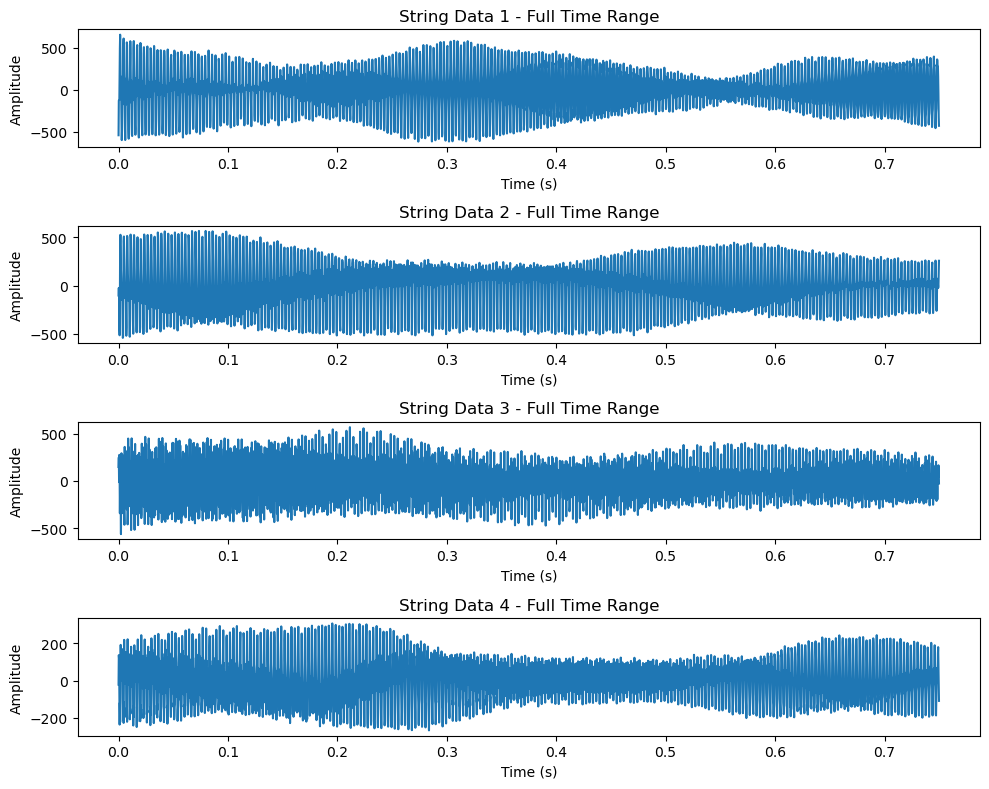

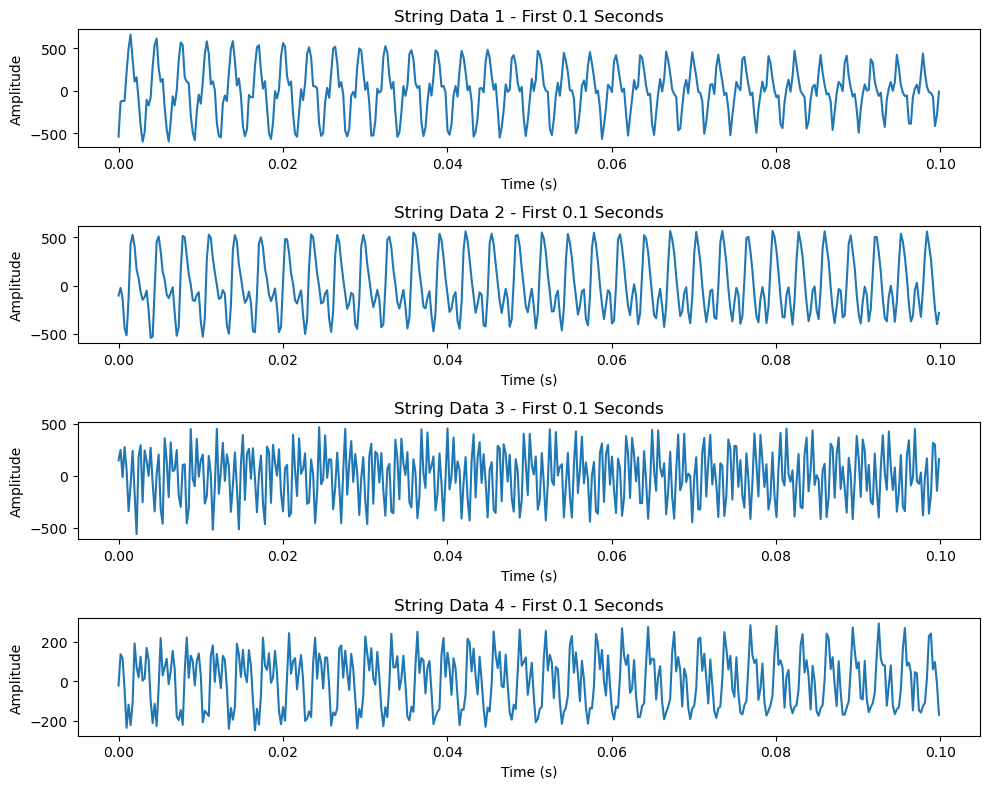

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
filename = 'Electric_Guitar_high_E_string.csv'
data = np.loadtxt(filename, delimiter=' ')  # Load data with space as delimiter

# Extract time and signal data for each of the four strings
time_data = data[:, 0]
string_data_1 = data[:, 1]
string_data_2 = data[:, 2]
string_data_3 = data[:, 3]
string_data_4 = data[:, 4]

# Compute sampling rate and time step from the time data
time_step = time_data[1] - time_data[0]  # Assumes uniform time intervals
sampling_rate = 1 / time_step            # Sampling rate in Hz

# Set a time cutoff for zoomed-in plots
time_cutoff = 0.1  # Time cutoff for zoomed-in view in seconds

# Plot 1: Full signal view for all strings
plt.figure(figsize=(10, 8))

# Plot each string's data in a separate subplot for the full time range
plt.subplot(4, 1, 1)
plt.plot(time_data, string_data_1)
plt.title("String Data 1 - Full Time Range")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 2)
plt.plot(time_data, string_data_2)
plt.title("String Data 2 - Full Time Range")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 3)
plt.plot(time_data, string_data_3)
plt.title("String Data 3 - Full Time Range")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 4)
plt.plot(time_data, string_data_4)
plt.title("String Data 4 - Full Time Range")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Adjust layout for readability
plt.tight_layout()
plt.show()

# Plot 2: Zoomed-in view for all strings up to the specified cutoff time
plt.figure(figsize=(10, 8))

# Plot each string's data in a separate subplot for the zoomed-in time range
plt.subplot(4, 1, 1)
plt.plot(time_data[time_data < time_cutoff], string_data_1[time_data < time_cutoff])
plt.title(f"String Data 1 - First {time_cutoff} Seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 2)
plt.plot(time_data[time_data < time_cutoff], string_data_2[time_data < time_cutoff])
plt.title(f"String Data 2 - First {time_cutoff} Seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 3)
plt.plot(time_data[time_data < time_cutoff], string_data_3[time_data < time_cutoff])
plt.title(f"String Data 3 - First {time_cutoff} Seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 4)
plt.plot(time_data[time_data < time_cutoff], string_data_4[time_data < time_cutoff])
plt.title(f"String Data 4 - First {time_cutoff} Seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Adjust layout for readability
plt.tight_layout()
plt.show()





______________________________________________________________________________________________
## Part 3b: Analyzing and Playing a Selected Guitar Waveform

For this section, I’m selecting one of the four recorded waveforms from Part 3a to analyze in greater depth. The goal is to explore its time-domain waveform \( S(t) \), examine its frequency spectrum \( |G(f)| \), and listen to the audio. By comparing each of the four options, I can observe how different plucking and pickup positions alter the sound’s characteristics.

### Steps

1. **Selecting a Waveform**:
   - Choose one of the four waveforms from the data set for analysis. Each waveform corresponds to a different combination of plucking and pickup position.

2. **Time-Domain and Frequency-Domain Analysis**:
   - Plot the selected waveform \( S(t) \) over time to observe its shape.
   - Calculate and plot the magnitude of its frequency spectrum \( |G(f)| \) to view the distribution of frequencies in the signal, revealing fundamental and harmonic content.

3. **Playing the Audio**:
   - Convert the selected waveform back to audio using IPython’s `Audio` function to hear how each configuration sounds.

4. **Comparing Across Waveforms**:
   - Vary the selected waveform by switching between the four available options, re-running the analysis and playback for each. This allows for a comparison of the physical effects (plucking and pickup location) on the resulting sound.

Through these steps, I aim to identify how changes in physical setup impact the tonal and harmonic qualities of the guitar string’s sound.





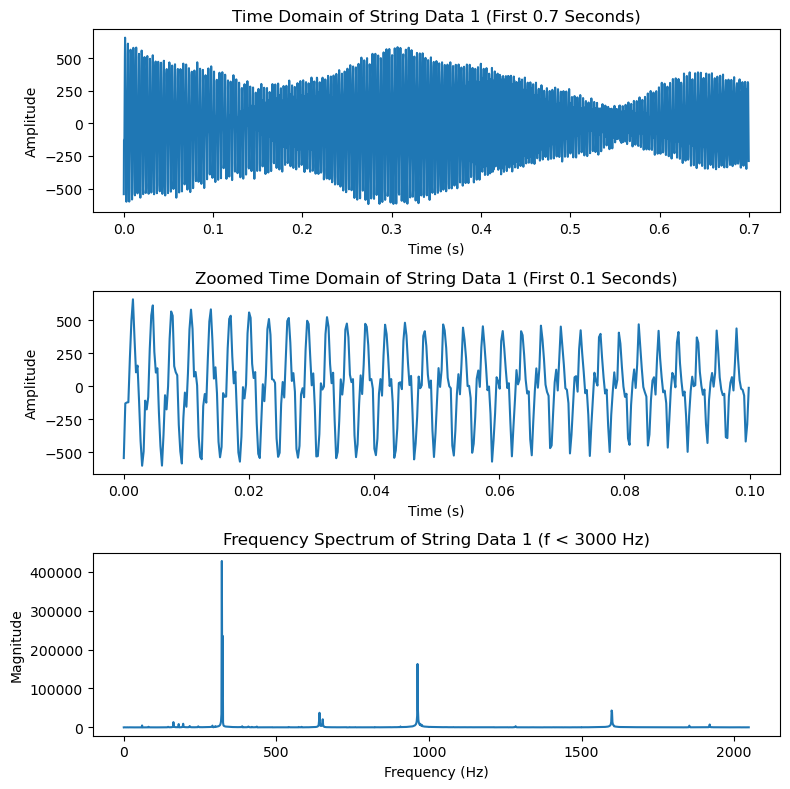

In [27]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load data from the CSV file
filename = 'Electric_Guitar_high_E_string.csv'  # Ensure this file is in the working directory
data = np.loadtxt(filename, delimiter=' ')  # Load data with space delimiter

# Define variables from loaded data
t_data = data[:, 0]         # Time data
dt_data = t_data[1] - t_data[0]  # Calculate time interval (sampling period)
rate_data = 1 / dt_data     # Calculate sampling rate

# String data columns (these are the signal data for each string)
string_data1 = data[:, 1]
string_data2 = data[:, 2]
string_data3 = data[:, 3]
string_data4 = data[:, 4]

# Set up a figure for plotting three different views of string_data1
plt.figure(figsize=(8, 8))

# Plot 1: Time-domain plot for the initial 0.7 seconds of string_data1
plt.subplot(3, 1, 1)
plt.plot(t_data[t_data < 0.7], string_data1[t_data < 0.7])
plt.title("Time Domain of String Data 1 (First 0.7 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot 2: Zoomed-in time-domain plot for the first 0.1 seconds of string_data1
plt.subplot(3, 1, 2)
plt.plot(t_data[t_data < 0.1], string_data1[t_data < 0.1])
plt.title("Zoomed Time Domain of String Data 1 (First 0.1 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Perform Fourier Transform to analyze the frequency content of string_data1
g_f = np.fft.rfft(string_data1)  # Computes the real Fourier Transform
freq = np.fft.rfftfreq(string_data1.size, dt_data)  # Generates frequency values

# Plot 3: Frequency spectrum plot of string_data1 for frequencies up to 3000 Hz
plt.subplot(3, 1, 3)
plt.plot(freq[freq < 3000], np.absolute(g_f[freq < 3000]))
plt.title("Frequency Spectrum of String Data 1 (f < 3000 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Adjust layout to ensure the subplots do not overlap
plt.tight_layout()
plt.show()

# Play the audio for string_data1 with the specified sampling rate
Audio(string_data1, rate=rate_data)



__________________________________________________________________________
## Part 4: Signal Processing on an Audio File Using FFTs

In this part, I’m using FFTs to perform signal processing on an audio file, `audio_sample.dat`, which contains waveform data in WAV format. The goal is to explore frequency-based filtering techniques by boosting or cutting bass, midrange, and treble components, then converting the modified signal back to the time domain for listening.

### Steps for Part 4

1. **Reading the Audio File**:
   - Load `audio_sample.dat` (a WAV-format file renamed with a `.dat` extension) using `scipy.io.wavfile.read` to obtain the sample rate and audio data.

2. **Listening to the Original Audio**:
   - Play the audio data using IPython’s `Audio` function to hear the unprocessed sound.

3. **Fourier Transform and Frequency Filtering**:
   - Perform an FFT to transform the audio signal into the frequency domain.
   - Apply filters to selectively cut or boost specific frequency ranges, such as bass, midrange, or treble, in the frequency spectrum.

4. **Inverse FFT and Listening to Filtered Signal**:
   - Use the inverse FFT to transform the filtered frequency data back to the time domain.
   - Listen to the filtered audio and observe how the frequency modifications affect the sound.

This approach allows for direct manipulation of the audio’s frequency content, providing hands-on experience with digital signal processing.

### Part 4a: Loading and Inspecting the Audio Data

1. **Reading the Audio File**:
   - Load `audio_sample.dat` and print the sample rate and shape of the audio data to understand the structure of the input signal.
   - Code:
     ```python
     from scipy.io.wavfile import read
     import numpy as np

     # Read the audio file
     sample_rate, audio_data = read('audio_sample.dat')

     # Display sample rate and shape of the audio data
     print("Sample Rate:", sample_rate, "Hz")
     print("Shape of Audio Data:", np.shape(audio_data))
     ```

This first step provides basic information about the audio file, including its sampling rate (samples per second) and the data’s shape, which reveals whether the audio is mono or stereo.

____________________________________________________________________________

In [30]:
# Import necessary libraries
from scipy.io.wavfile import read
import numpy as np

# Read the audio file; this function returns the sample rate and audio data
sample_rate, audio_data = read('audio_sample.dat')

# Display the shape of the audio data array and the sample rate in a descriptive format
print("Sample Rate:", sample_rate, "Hz")
print("Audio Data Shape:", np.shape(audio_data))  # Shape can reveal stereo (2 channels) or mono (1 channel)




Sample Rate: 44100 Hz
Audio Data Shape: (1323000, 2)


_________________________________________________________

## Preparing a Mono Signal from Stereo Audio Data

The `audio_data` array contains 1,323,000 audio samples recorded at a sampling rate of 44,100 Hz. Each sample has both left and right channels, giving us a stereo recording. To simplify the analysis and processing, we’ll take only the first 25 seconds of the audio and combine the left and right channels to create a mono signal.

### Steps

1. **Define the Sample Time and Time Array**:
   - Calculate the `sample_time` as the inverse of `sample_rate`, which gives the time interval between samples.
   - Generate a time array, `t`, spanning the first 25 seconds using `np.arange`, with steps equal to `sample_time`.

2. **Extract Left and Right Channels**:
   - Use slicing to select the first 25 seconds of the left and right channels separately from `audio_data`.
   - `S_t_left` contains the left channel samples, and `S_t_right` contains the right channel samples.

3. **Combine Channels to Create Mono Signal**:
   - Create the mono signal `S_t` by adding `S_t_left` and `S_t_right` element-wise. This combination gives us a single channel that retains the audio information from both the left and right channels.


In [33]:
# Calculate the sample time, i.e., the time interval between samples
sample_time = 1 / sample_rate

# Create a time array `t` for a 25-second duration, with steps based on `sample_time`
t = np.arange(0, 25, sample_time)

# Extract the first 25 seconds of audio data from both left and right channels
# Assuming `audio_data` has two channels (stereo)
S_t_left = audio_data[0:int(25 * sample_rate), 0]  # Left channel
S_t_right = audio_data[0:int(25 * sample_rate), 1]  # Right channel

# Combine left and right channels to create a mono signal by summing both channels
S_t = S_t_left + S_t_right

# Display the shape of the resulting mono signal
print("Shape of Mono Signal S_t:", np.shape(S_t))




Shape of Mono Signal S_t: (1102500,)


## Part 4b: Plotting and Analyzing the Mono Signal

In this part, I’m visualizing the mono signal \( S(t) \) in both the time and frequency domains and then playing the audio.

### Steps

1. **Plot \( S(t) \) vs. Time**: Shows the time-domain waveform for the first 25 seconds.
2. **Calculate FFT \( G(f) \)**: Computes the frequency spectrum of \( S(t) \).
3. **Plot \( |G(f)| \)**: Plots the magnitude of the spectrum for frequencies between 5 Hz and 20 kHz.
4. **Play \( S(t) \)**: Plays the original signal.


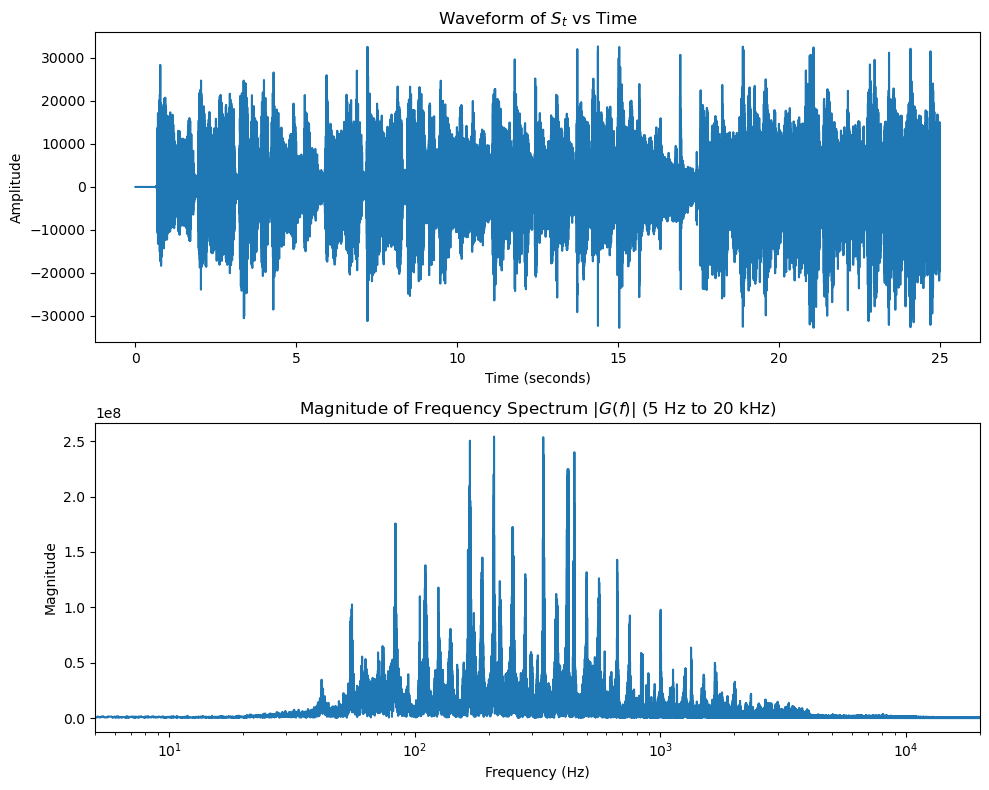

In [36]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Create a new figure for plotting the waveform and frequency spectrum
plt.figure(figsize=(10, 8))

# Plot 1: Time-domain waveform of S_t
plt.subplot(2, 1, 1)
plt.plot(t, S_t)
plt.title("Waveform of $S_t$ vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Perform Fourier Transform to get frequency content of the signal S_t
g_f = np.fft.rfft(S_t)  # Computes the real FFT, providing the frequency spectrum
freq = np.fft.rfftfreq(S_t.size, sample_time)  # Calculates the corresponding frequency bins

# Plot 2: Frequency spectrum (magnitude) for frequencies from 5 Hz to 20 kHz
plt.subplot(2, 1, 2)
plt.plot(freq[(freq >= 5) & (freq <= 20000)], np.absolute(g_f[(freq >= 5) & (freq <= 20000)]))
plt.xscale('log')  # Use logarithmic scale for the x-axis (frequency)
plt.xlim(5, 20000)  # Set x-axis limits to 5 Hz - 20 kHz
plt.title("Magnitude of Frequency Spectrum $|G(f)|$ (5 Hz to 20 kHz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Play the audio signal S_t at the specified sample rate
Audio(S_t, rate=sample_rate)




## Part 4c: Applying a Tone Control Filter to the Audio Signal

In this part, I’m using a tone control filter to modify the audio signal \( S(t) \). The filter allows adjustments to bass, midrange, and treble frequencies, simulating audio tone controls.

### Steps

1. **Plot the Original Frequency Spectrum \( G(f) \)**.
2. **Apply Tone Control Filter**:
   - Call `tone_control` with user-defined bass, midrange, and treble adjustments (values between -10 and +10).
3. **Plot Tone Response in Decibels**:
   - Calculate the tone response in dB: `20 * np.log10(tone_response)`.
4. **Apply Filter to \( G(f) \)**:
   - Compute the filtered frequency spectrum: `G_f_filtered = tone_response * G_f`.
5. **Plot Filtered Frequency Spectrum**.
6. **Inverse FFT to Get Filtered Signal \( S(t) \)**:
   - Perform inverse FFT on `G_f_filtered` to get `S_t_filtered`.
7. **Plot and Play Filtered Signal \( S(t) \)**.

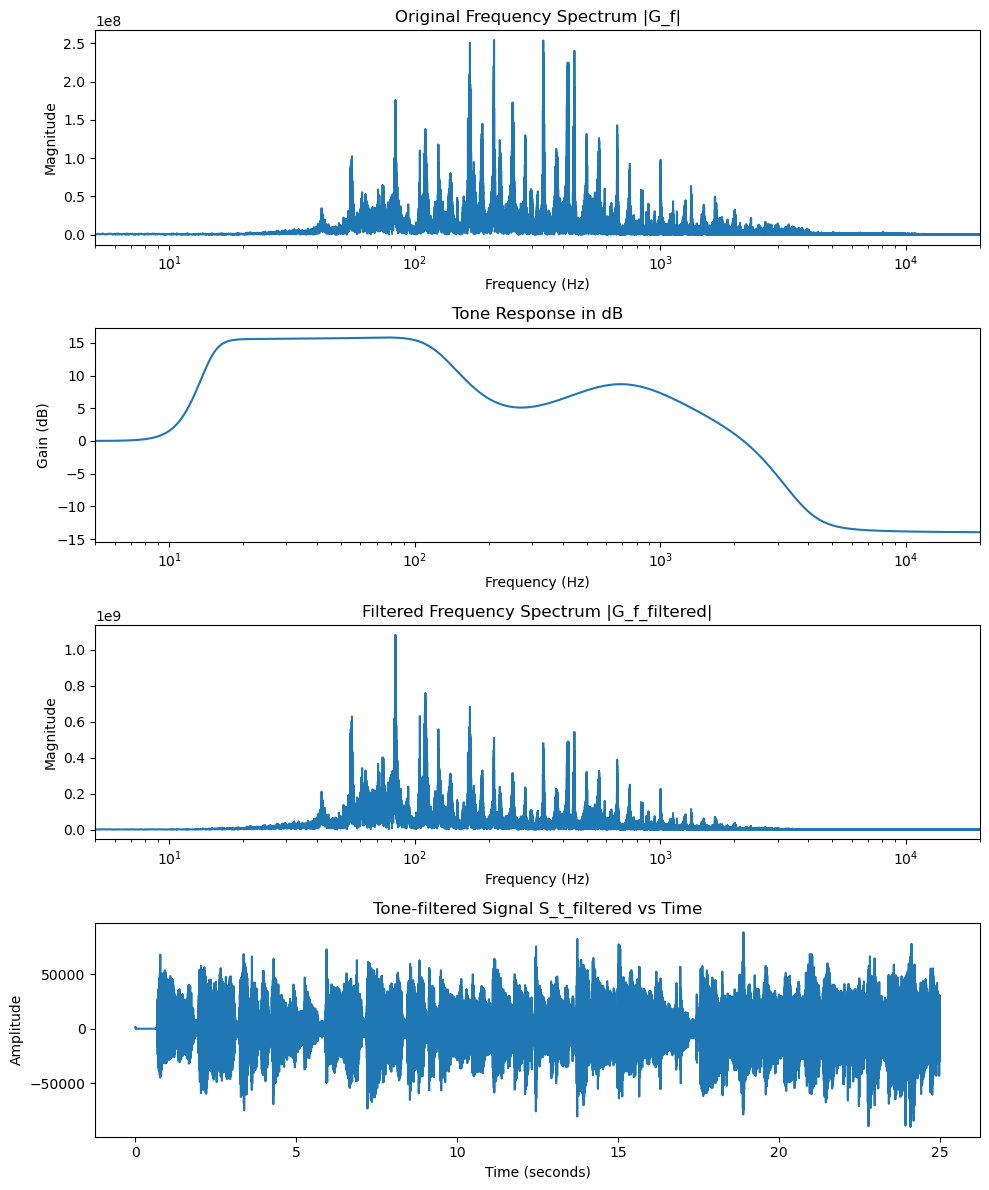

In [40]:
# Define the tone control function
def tone_control(f, B, M, T):
    """
    Calculates and returns an array to be multiplied with the Fourier spectrum G_f
    to modify the tone according to bass, midrange, and treble input controls.

    Inputs:
        f : frequency array (same as used for G_f)
        B : bass control, from -10 to 10 (+ for boost, - for attenuate)
        M : midrange control, from -10 to 10 (+ for boost, - for attenuate)
        T : treble control, from -10 to 10 (+ for boost, - for attenuate)
        
    Output:
        tone_response : filter array to multiply with G_f to adjust the tone
        
    Filter Design:
        - Bass: Low-pass Butterworth filter
        - Midrange: Band-pass filter (combined high and low pass)
        - Treble: High-pass Butterworth filter
    """
    fb = 120    # Cutoff frequency for bass filter (low frequencies)
    fml = 650   # Lower cutoff for midrange filter
    fmh = 750   # Upper cutoff for midrange filter
    ft = 4000   # Cutoff frequency for treble filter (high frequencies)
    order = 4   # Filter order for sharper cutoff

    # Clip control values to the range [-10, 10]
    B = np.clip(B, -10, 10)
    M = np.clip(M, -10, 10)
    T = np.clip(T, -10, 10)

    # Bass filter: Low-pass Butterworth filter design
    bass1 = 1 / np.sqrt(1 + (f / fb)**(2 * order))
    bass2 = (f / 15)**8 / np.sqrt(1 + (f / 15)**16)
    bass = 1 + np.abs(B) * bass1 * bass2

    # Midrange filter: Band-pass filter combining low and high-pass filters
    mid1 = 1 / np.sqrt(1 + (f / fmh)**4)
    mid2 = (f / fml)**2 / np.sqrt(1 + (f / fml)**4)
    mid = 1 + np.abs(M) * mid1 * mid2

    # Treble filter: High-pass Butterworth filter design
    treb = (f / ft)**order / np.sqrt(1 + (f / ft)**(2 * order))
    treb = 1 + np.abs(T) * treb

    # Apply attenuation if controls are negative
    if B < 0:
        bass = 1 / bass
    if M < 0:
        mid = 1 / mid
    if T < 0:
        treb = 1 / treb

    # Combine filters to create the tone response
    tone_response = bass * mid * treb
    
    return tone_response


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Perform Fourier Transform to analyze the frequency content of S_t
g_f = np.fft.rfft(S_t)
freq = np.fft.rfftfreq(S_t.size, sample_time)

# Define tone control parameters
bass_gain = 5       # Boost bass
midrange_gain = 3   # Boost midrange
treble_gain = -4    # Attenuate treble

# Get tone control filter based on specified gains
tone_response = tone_control(freq, bass_gain, midrange_gain, treble_gain)

# Plot the original and processed signals
plt.figure(figsize=(10, 12))

# Plot 1: Original frequency spectrum of S_t
plt.subplot(4, 1, 1)
plt.plot(freq[(freq >= 5) & (freq <= 20000)], np.abs(g_f[(freq >= 5) & (freq <= 20000)]))
plt.xscale('log')
plt.xlim(5, 20000)
plt.title("Original Frequency Spectrum |G_f|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Plot 2: Tone control response in dB
plt.subplot(4, 1, 2)
plt.plot(freq[(freq >= 5) & (freq <= 20000)], 20 * np.log10(tone_response[(freq >= 5) & (freq <= 20000)]))
plt.xscale('log')
plt.xlim(5, 20000)
plt.title("Tone Response in dB")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")

# Apply the tone control filter to the original frequency spectrum
g_f_filtered = tone_response * g_f

# Plot 3: Filtered frequency spectrum after applying tone control
plt.subplot(4, 1, 3)
plt.plot(freq[(freq >= 5) & (freq <= 20000)], np.abs(g_f_filtered[(freq >= 5) & (freq <= 20000)]))
plt.xscale('log')
plt.xlim(5, 20000)
plt.title("Filtered Frequency Spectrum |G_f_filtered|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Perform inverse FFT to convert back to the time domain
S_t_filtered = np.fft.irfft(g_f_filtered)

# Plot 4: Time-domain waveform of the tone-filtered signal
plt.subplot(4, 1, 4)
plt.plot(t, S_t_filtered[:len(t)])
plt.title("Tone-filtered Signal S_t_filtered vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Play the tone-filtered audio
Audio(S_t_filtered, rate=sample_rate)

